🧮  Quantitative Analysis 

a simple pipeline using pynance for data fetching and TA-Lib for technical indicators.

In [4]:
import yfinance as yf
import talib
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('../data/AAPL_historical_data.csv')
data = data.rename(columns=str.lower)  # Make column names lowercase for easier use
data.head()

,date,open,high,low,close,adj close,volume,dividends,stock splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


📊 Compute Technical Indicators with TA-Lib

In [6]:
# Calculate Moving Averages

data['SMA_20'] = talib.SMA(data['close'], timeperiod=20)
data['SMA_50'] = talib.SMA(data['close'], timeperiod=50)
# RSI
data['RSI'] = talib.RSI(data['close'], timeperiod=14)

# MACD
macd, macdsignal, macdhist = talib.MACD(data['close'])
data['MACD'] = macd
data['MACD_Signal'] = macdsignal

📉 Visualize Example: Moving Average Cross Strategy

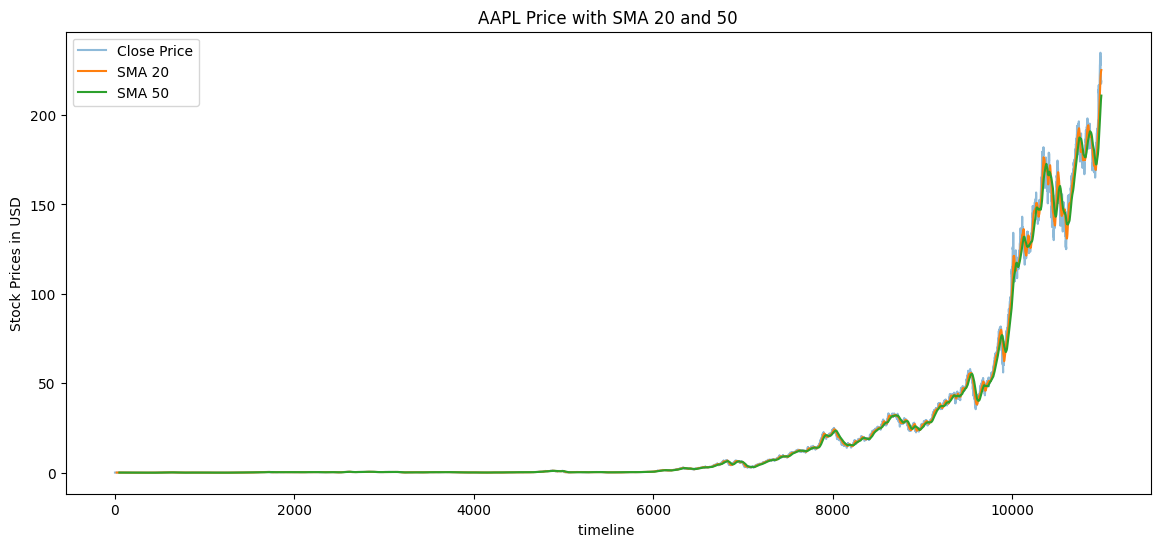

In [7]:
plt.figure(figsize=(14,6))
plt.plot(data['close'], label='Close Price', alpha=0.5)
plt.plot(data['SMA_20'], label='SMA 20')
plt.plot(data['SMA_50'], label='SMA 50')
plt.title("AAPL Price with SMA 20 and 50")
plt.ylabel('Stock Prices in USD')
plt.xlabel('timeline ')
plt.legend()
plt.show()

In [8]:
tickers = ['AAPL', 'AMZN', 'GOOG', 'FB', 'MSFT', 'NVDA', 'TSLA']
data = {ticker: yf.download(ticker, start='2023-01-01', end='2024-01-01') for ticker in tickers}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FB']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
